# Import Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# Import Data

In [43]:
#Create a path to where your data is stored.
path = r'/Users/amritkaur/Desktop/CAREERFOUNDRY/Machine Learning/Achievement 1/Exercise 1.4/Data Sets'

In [69]:
#Read the data.
climate = pd.read_csv(os.path.join(path, 'Climate_scaled.csv'))
climate

,Unnamed: 0,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1,1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,2,2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,4,4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,22946,22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,22947,22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,22948,22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [71]:
df_climate = climate.drop(['Unnamed: 0'], axis = 1)

In [73]:
df_climate

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [46]:
# Import the pleasant weather data
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [47]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [49]:
# Create an 'X' matrix by dropping the unneeded columns
X = df_climate.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [50]:
# Now, Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE


i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

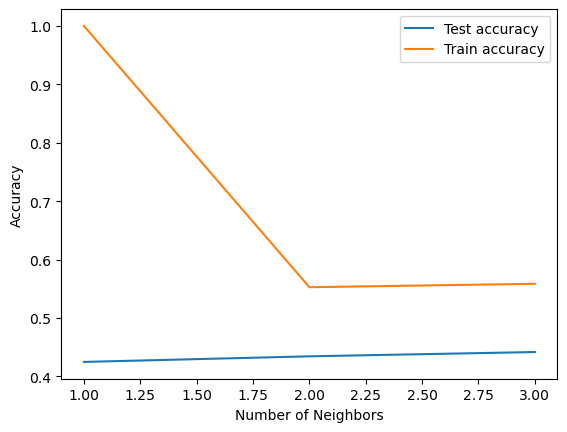

In [76]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


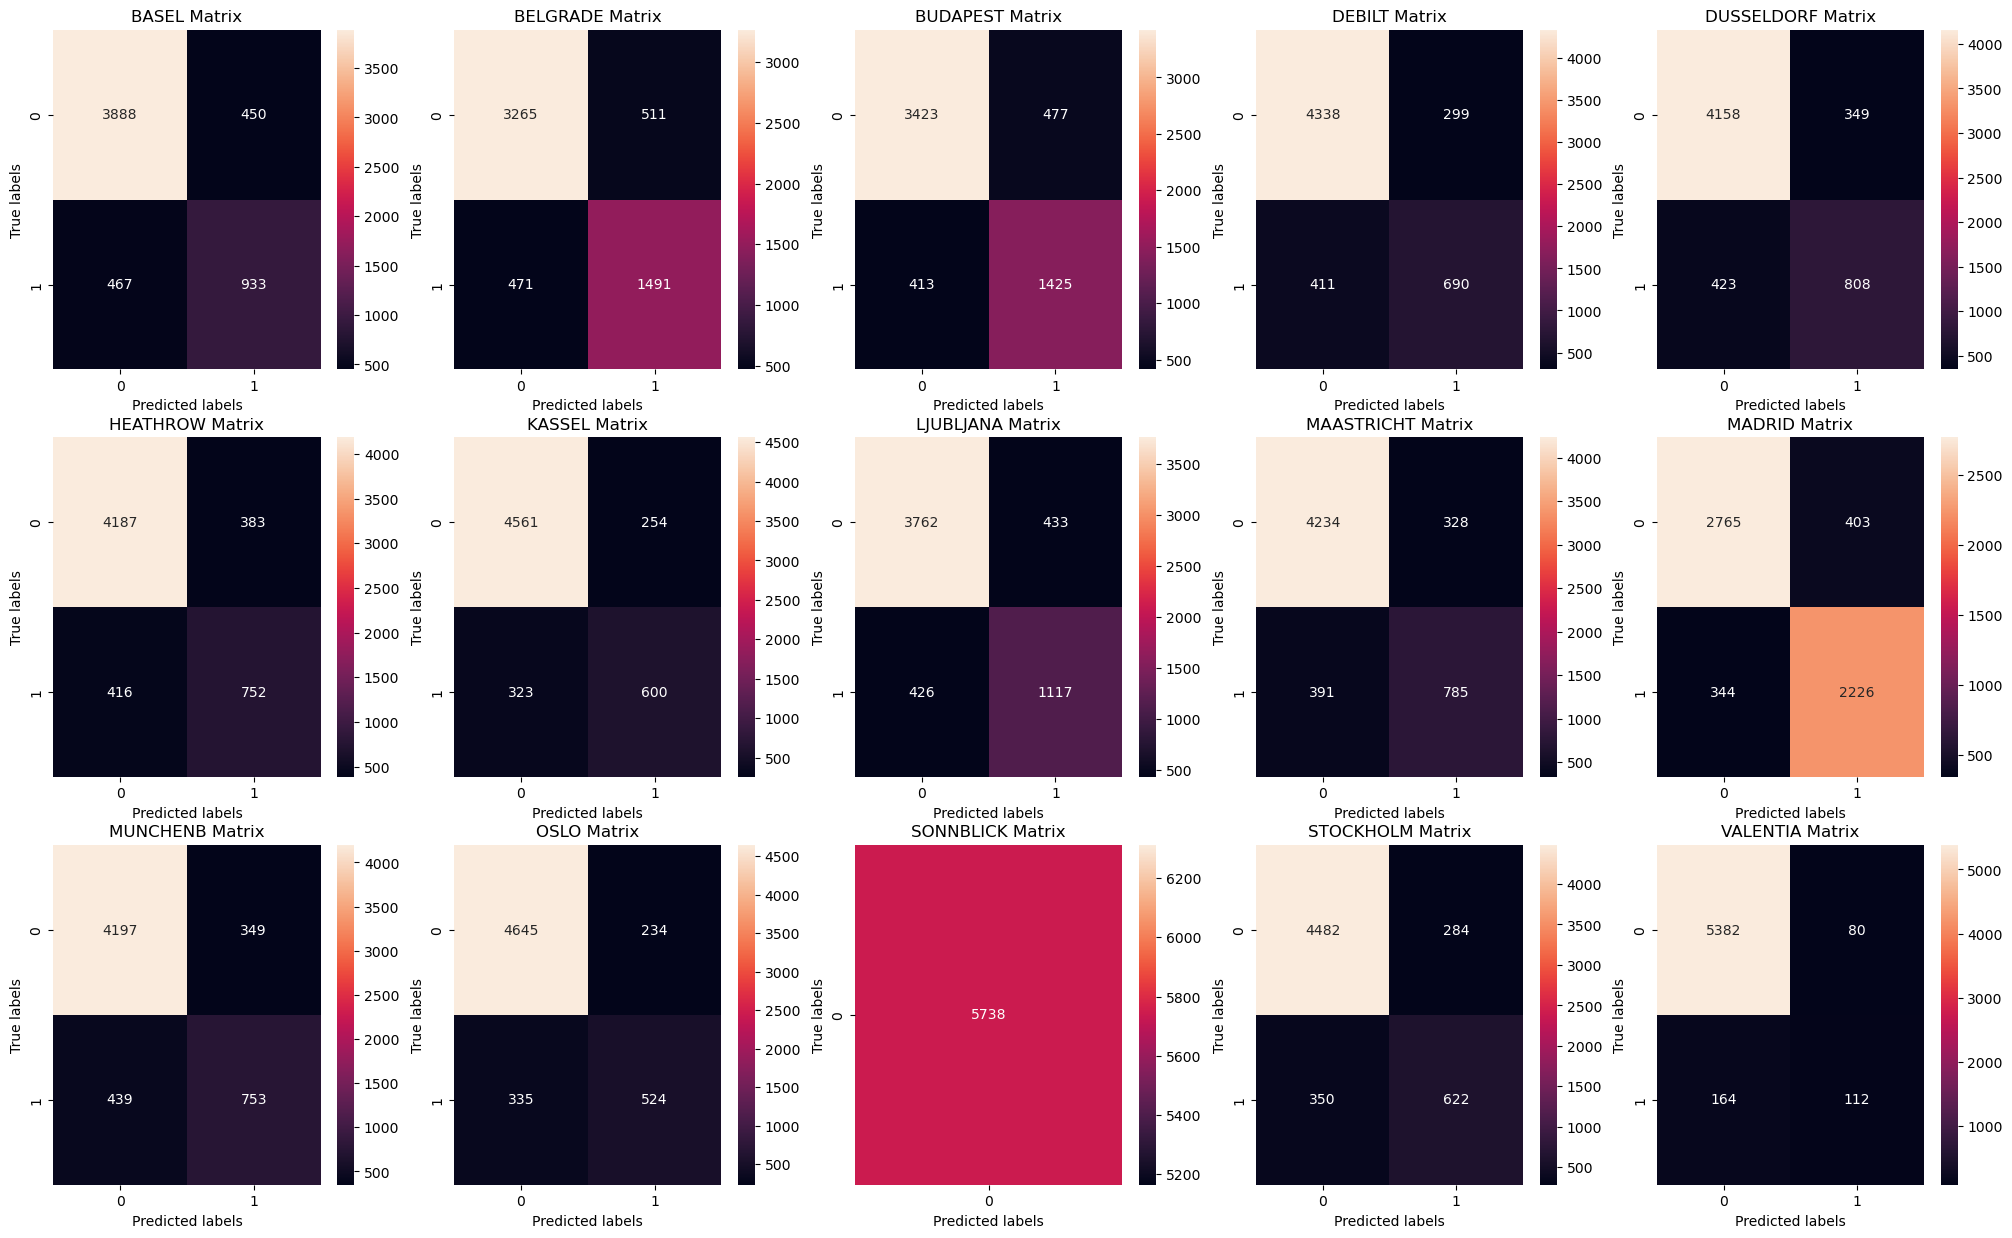

In [77]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


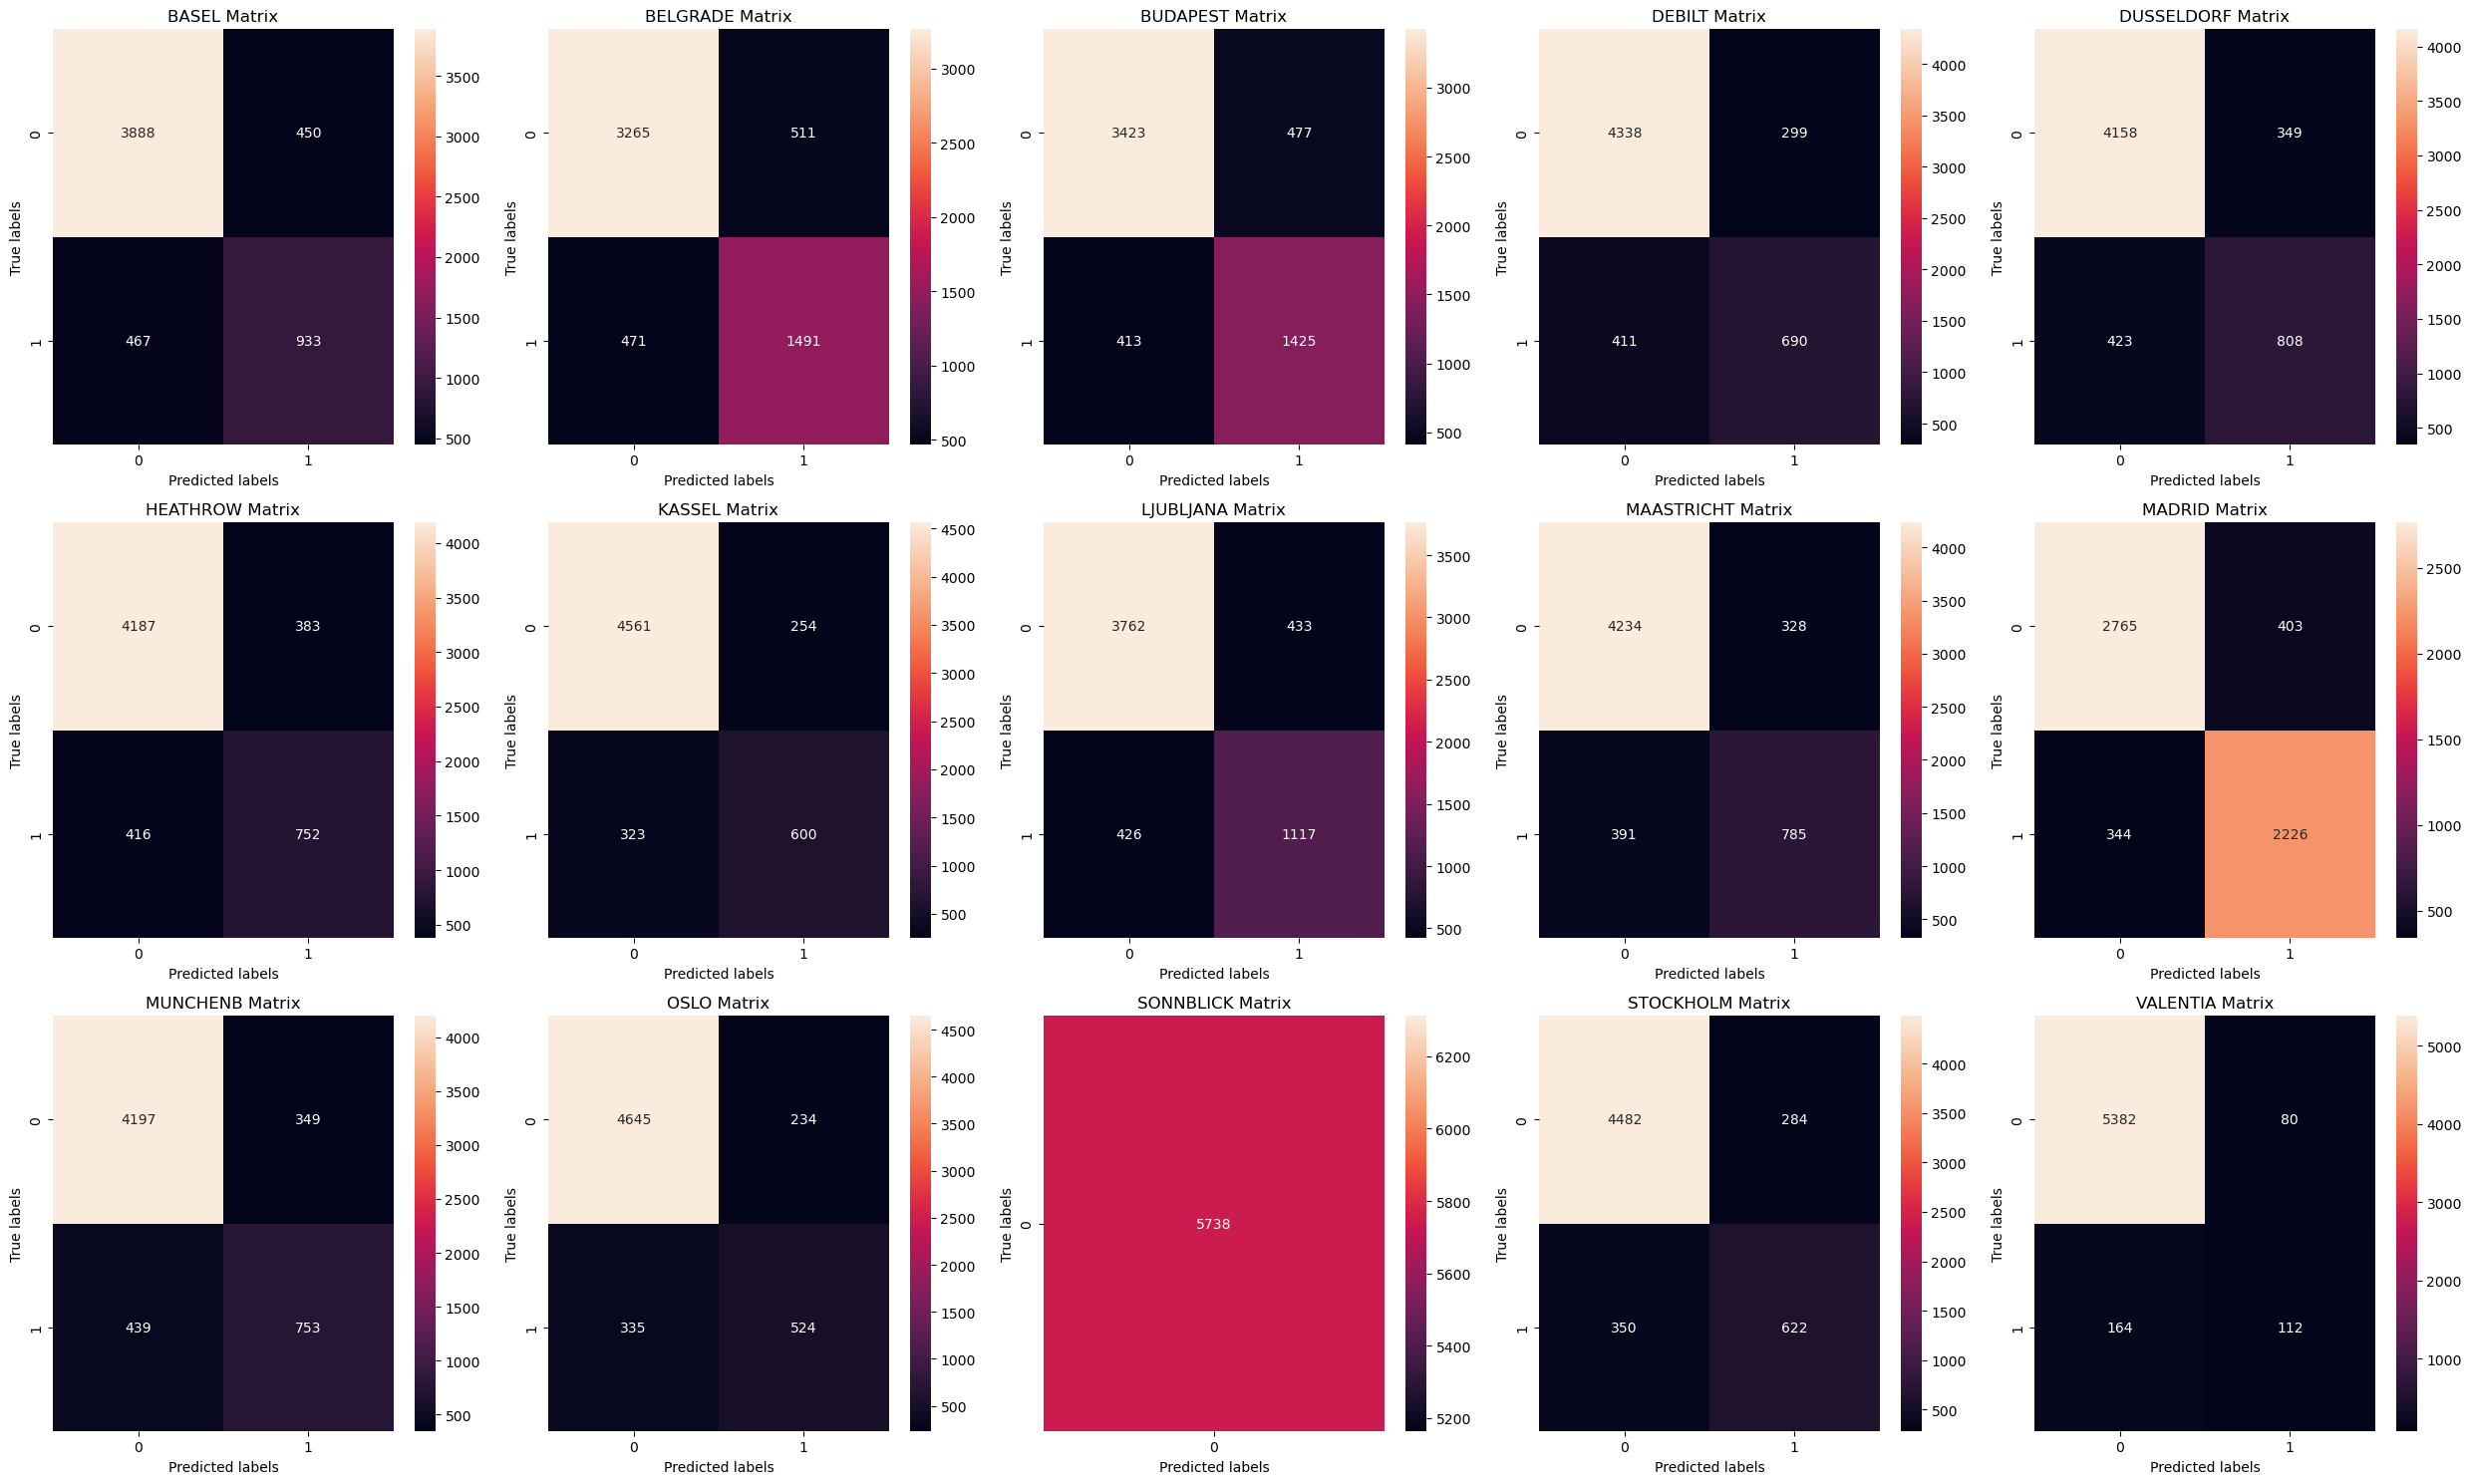

BASEL: 0.8402
BELGRADE: 0.8289
BUDAPEST: 0.8449
DEBILT: 0.8763
DUSSELDORF: 0.8655
HEATHROW: 0.8608
KASSEL: 0.8994
LJUBLJANA: 0.8503
MAASTRICHT: 0.8747
MADRID: 0.8698
MUNCHENB: 0.8627
OSLO: 0.9008
SONNBLICK:100
STOCKHOLM: 0.8895
VALENTIA: 0.9575


In [85]:
# Extract unique station names
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
accuracies = {}

# Set up plot
fig, ax = plt.subplots(3, 5, figsize=(25, 15))

count = 0
for i in range(3):
    for j in range(5):
        if count >= len(locations):  # Prevents index errors if locations are less than 15
            break
        
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred[:, count])
# Extract TN, FP, FN, TP
        if cm.shape == (2,2):  # Ensure it's a valid confusion matrix
            TN, FP, FN, TP = cm.ravel()
            accuracy = (TP + TN) / (TP + TN + FP + FN)
        else:  # Handle cases where only one class exists
            accuracy = None

        accuracies[name] = accuracy

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')

        count += 1

plt.tight_layout()
plt.show()

# Display accuracy values
for station, acc in accuracies.items():
    print(f"{station}: {acc:.4f}" if acc is not None else f"{station}:100")